Dataset Information
Additional Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
red = pd.read_csv("G:\\D\\git\\main\\Python\\udemy projects\\Red-White-Wine-EDA\\winequality-red.csv", delimiter=';')
white = pd.read_csv("G:\\D\\git\\main\\Python\\udemy projects\\Red-White-Wine-EDA\\winequality-white.csv", delimiter=';')

In [4]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Questions that we can try to answer

### Which factor or combination of factors affect the quality of Red wine/White wine?
### Do the different types of wines have fifferent factors affecting quality?
### Is there any interesting trends that exist in other columns besides quality?

# Red Wine analysis

In [5]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Which factor or combination of factors affect the quality of Red Wine
### Is there any interesting trends that exists in other columns besides quality

In [6]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# So there is no missing values

In [7]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
red['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Analysis over Red Wine

## Let's first check the Quality Column

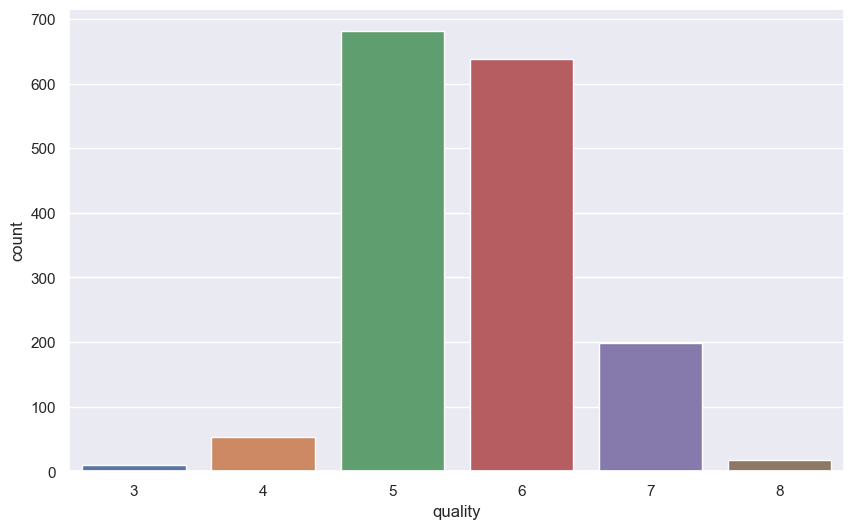

In [9]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data=red, x='quality')
plt.show()

### Majority of red wine are medium quality wines

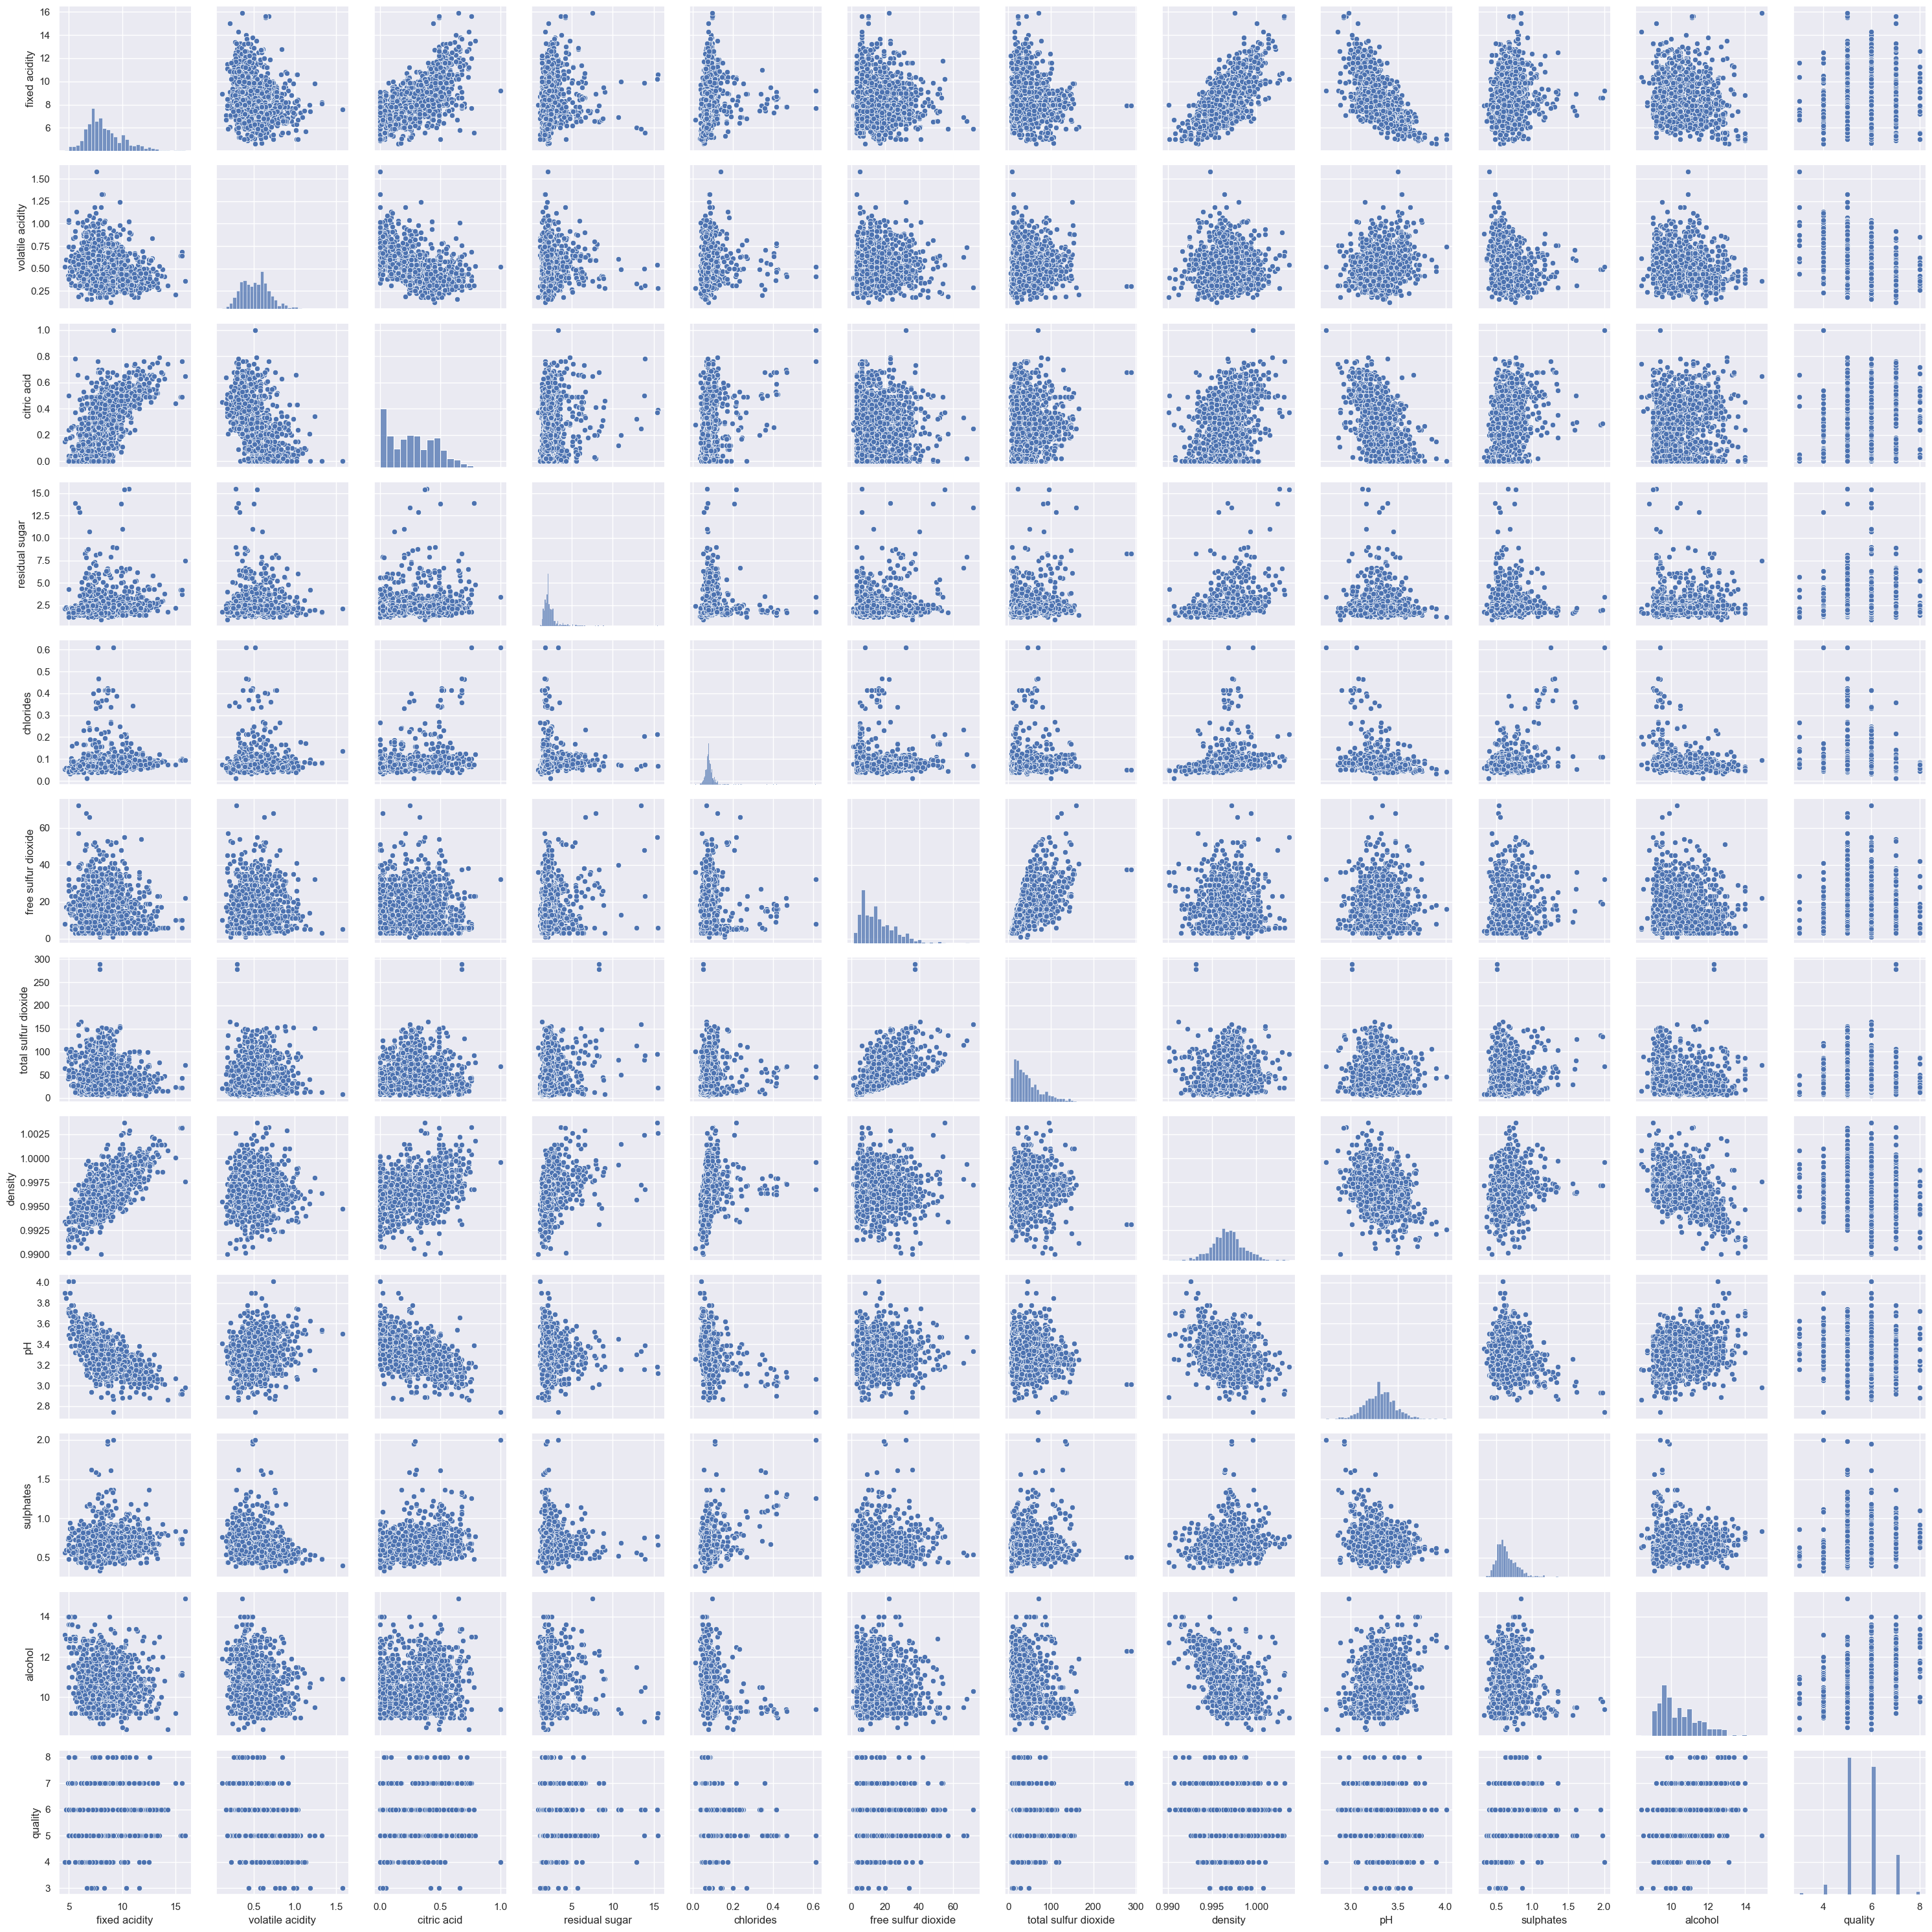

In [10]:
sns.pairplot(red)
plt.tight_layout()
plt.show()

# Let's generate a heatmap of correlation among the variables

<Axes: >

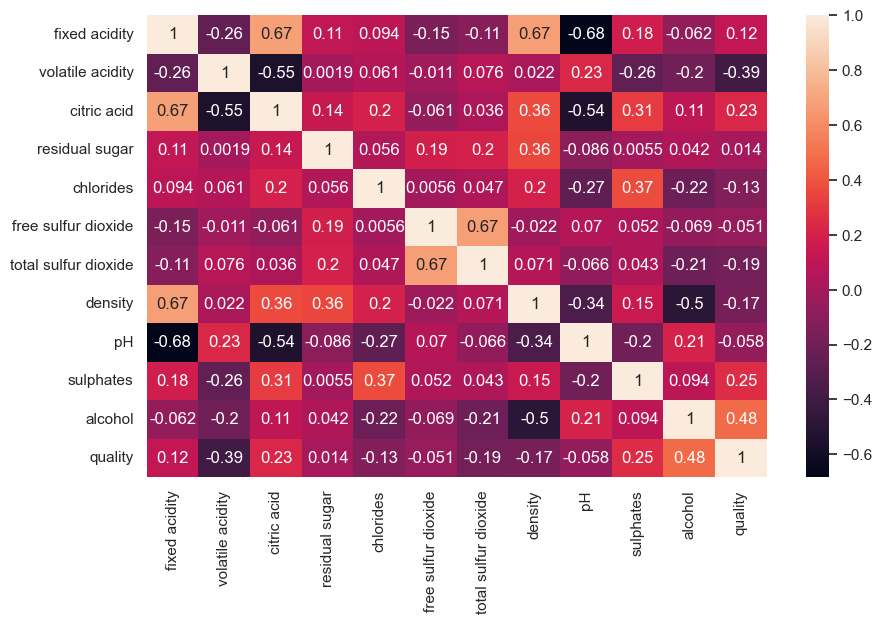

In [11]:
sns.heatmap(red.corr(), annot=True, cmap=None)

<Axes: xlabel='alcohol', ylabel='Density'>

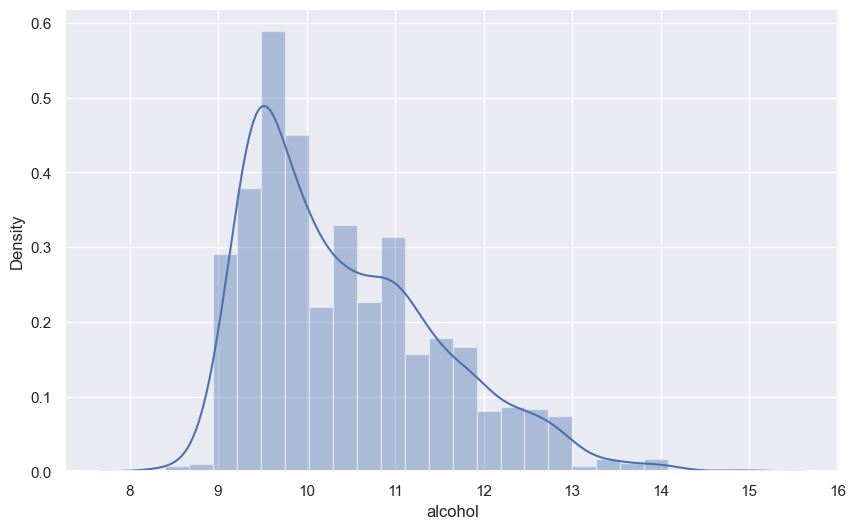

In [12]:
sns.distplot(red.alcohol)

# It looks like positively skewed

In [13]:
from scipy.stats import skew
print(skew(red.alcohol))
print(red.alcohol.mean())
print(red.alcohol.median())

0.8600210646566755
10.422983114446529
10.2


# Let's see how alcohol varies w.r.t. quality

<Axes: xlabel='quality', ylabel='alcohol'>

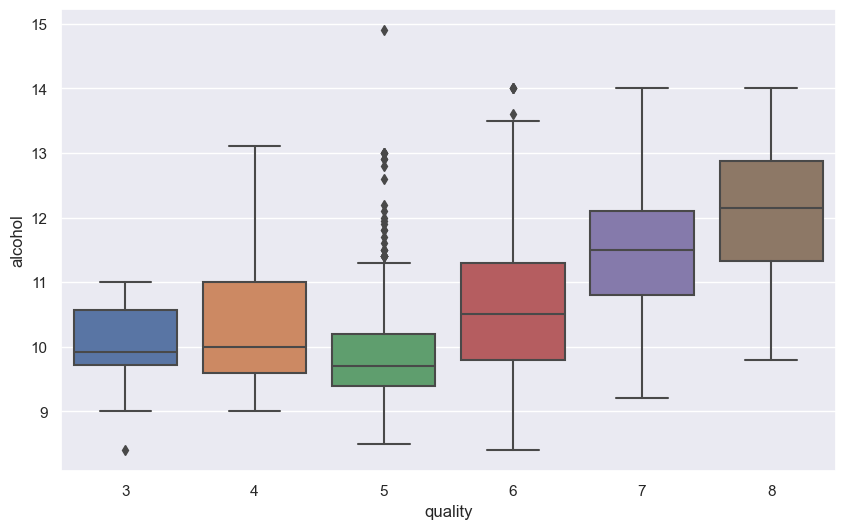

In [14]:
sns.boxplot(data=red, y='alcohol', x='quality')

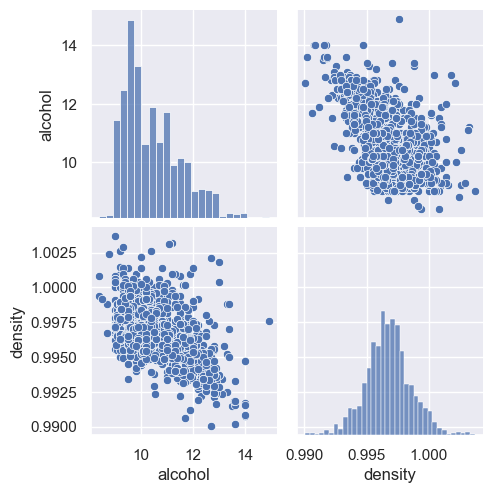

In [15]:
sns.pairplot(red[['alcohol','density']])

# So there's negative correlation between density and alcohol content

<Axes: xlabel='density', ylabel='alcohol'>

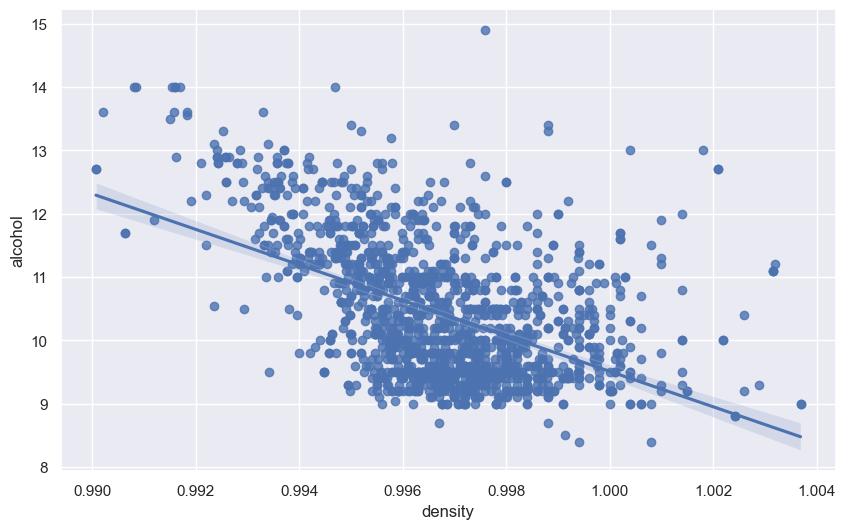

In [16]:
sns.regplot(data=red,x='density',y='alcohol')

# So higher alcohol content relates to low density

# Let's analyse sulphates and quality

<Axes: xlabel='quality', ylabel='sulphates'>

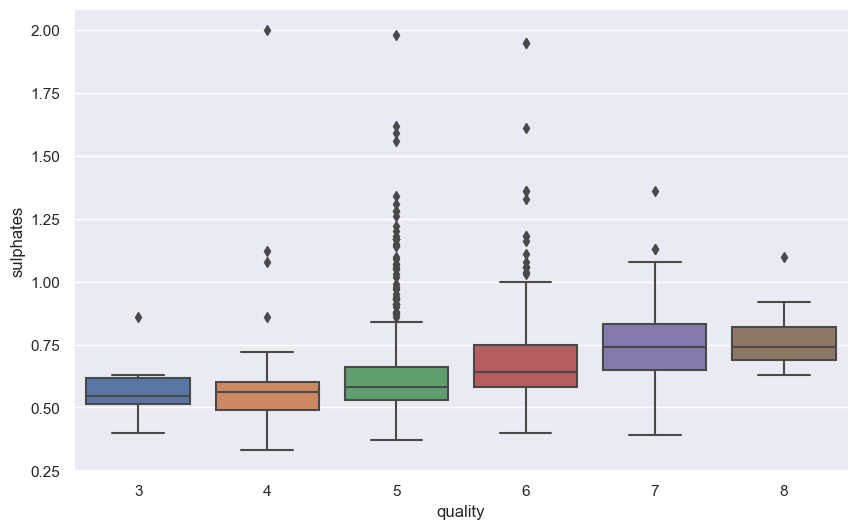

In [17]:
sns.boxplot(data=red,y='sulphates', x='quality')

### So higher the quality, higher the sulphates

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

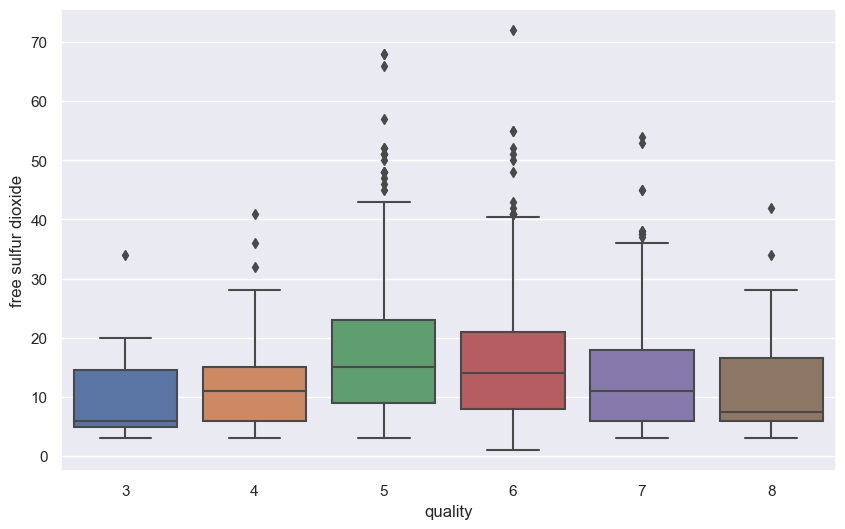

In [18]:
sns.boxplot(data=red,y='free sulfur dioxide', x='quality')

### So as quality goes up, free sulfur dioxide goes down

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

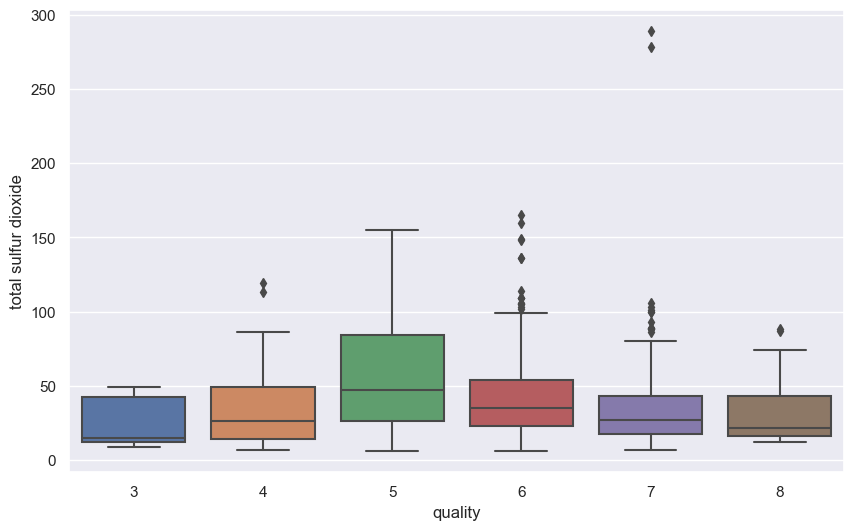

In [19]:
sns.boxplot(data=red,y='total sulfur dioxide', x='quality')

### So as quality goes up, total sulfur dioxide goes down

# Let's analyse effect of various acidity on quality

<Axes: xlabel='quality', ylabel='fixed acidity'>

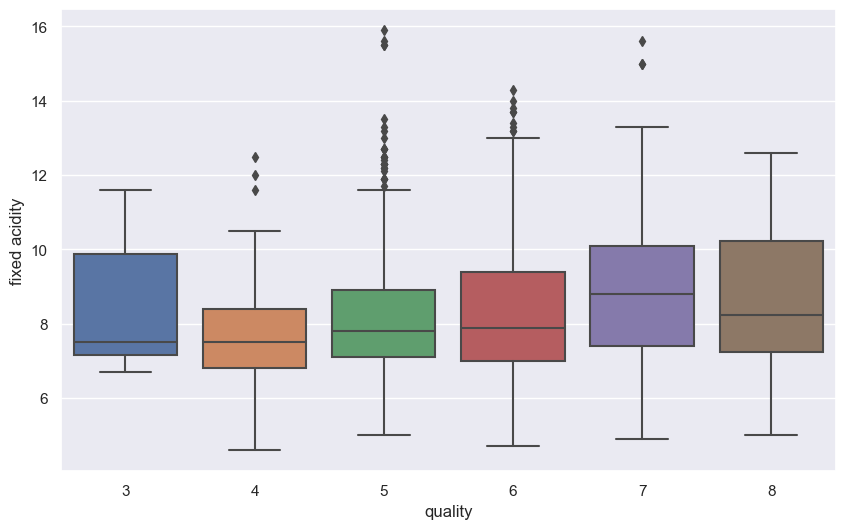

In [20]:
sns.boxplot(data=red,y='fixed acidity', x='quality')

<Axes: xlabel='quality', ylabel='citric acid'>

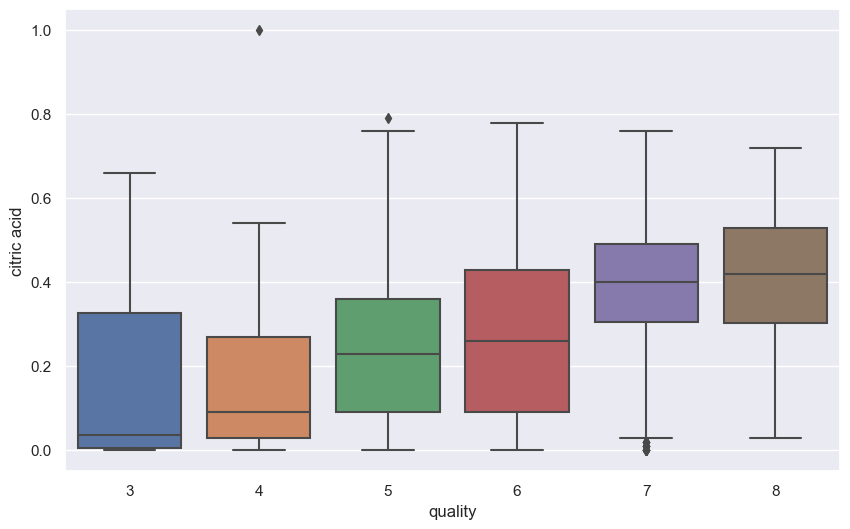

In [21]:
sns.boxplot(data=red,y='citric acid', x='quality')

### So high citric acid is found in high quality wine

<Axes: xlabel='quality', ylabel='volatile acidity'>

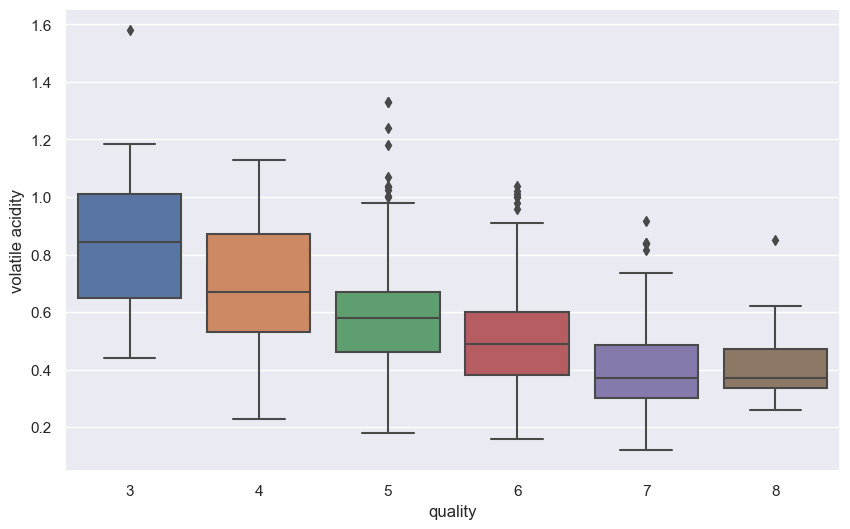

In [22]:
sns.boxplot(data=red,y='volatile acidity', x='quality')

### So lower citric acid is found in high quality wine

In [23]:
red['Total_Acidity'] = red['volatile acidity'] + red['citric acid'] + red['fixed acidity']

<Axes: xlabel='quality', ylabel='Total_Acidity'>

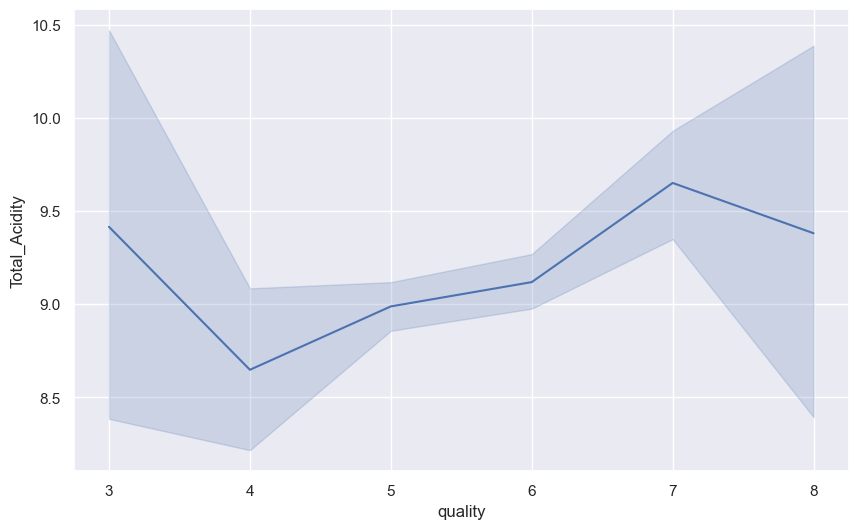

In [24]:
sns.lineplot(data=red,y='Total_Acidity',x='quality')

#### There is no apparant relation between total acidity and quality

# CONCLUSIONS:

### Free sulphur dioxide and total sulphur dioxide have some positive relation to residual sugar. Also, quantity of SO2 depends on sugar content.
### Density has a positive correlation with fixed acidity and residual sugar
### Density has negative correlation with alcohol and pH
### Quality has positive correlation with alcohol, citric acid and sulphates and negatively correlated with citric acid.
### Fixed acidity has positive correlation with citric acid and density and negativly correlated wit pH.
### Residual sugar has positive correlation with citric acid
### pH has a negative correlation with fixed acidity and citric acid, but positively collrelated with volatile acid

# White Wine analysis

In [25]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [26]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### So there's no missing values.

In [27]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

<Axes: xlabel='quality', ylabel='count'>

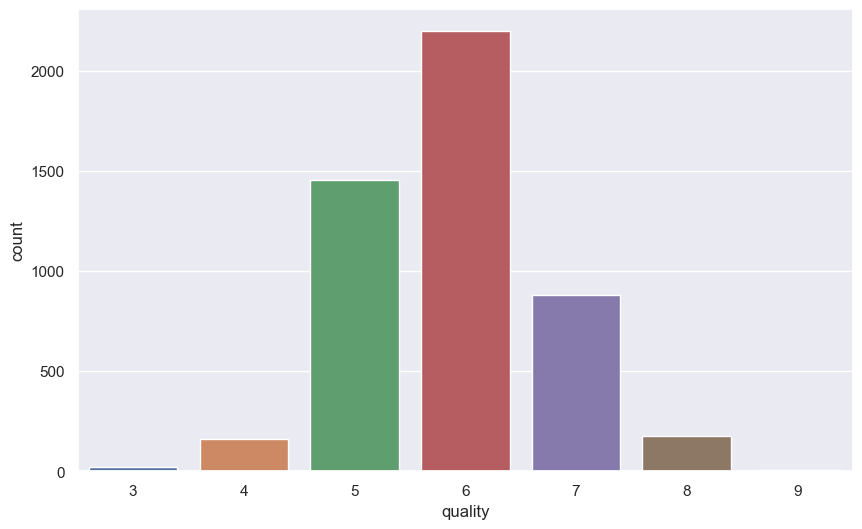

In [29]:
sns.countplot(data = white,x='quality')

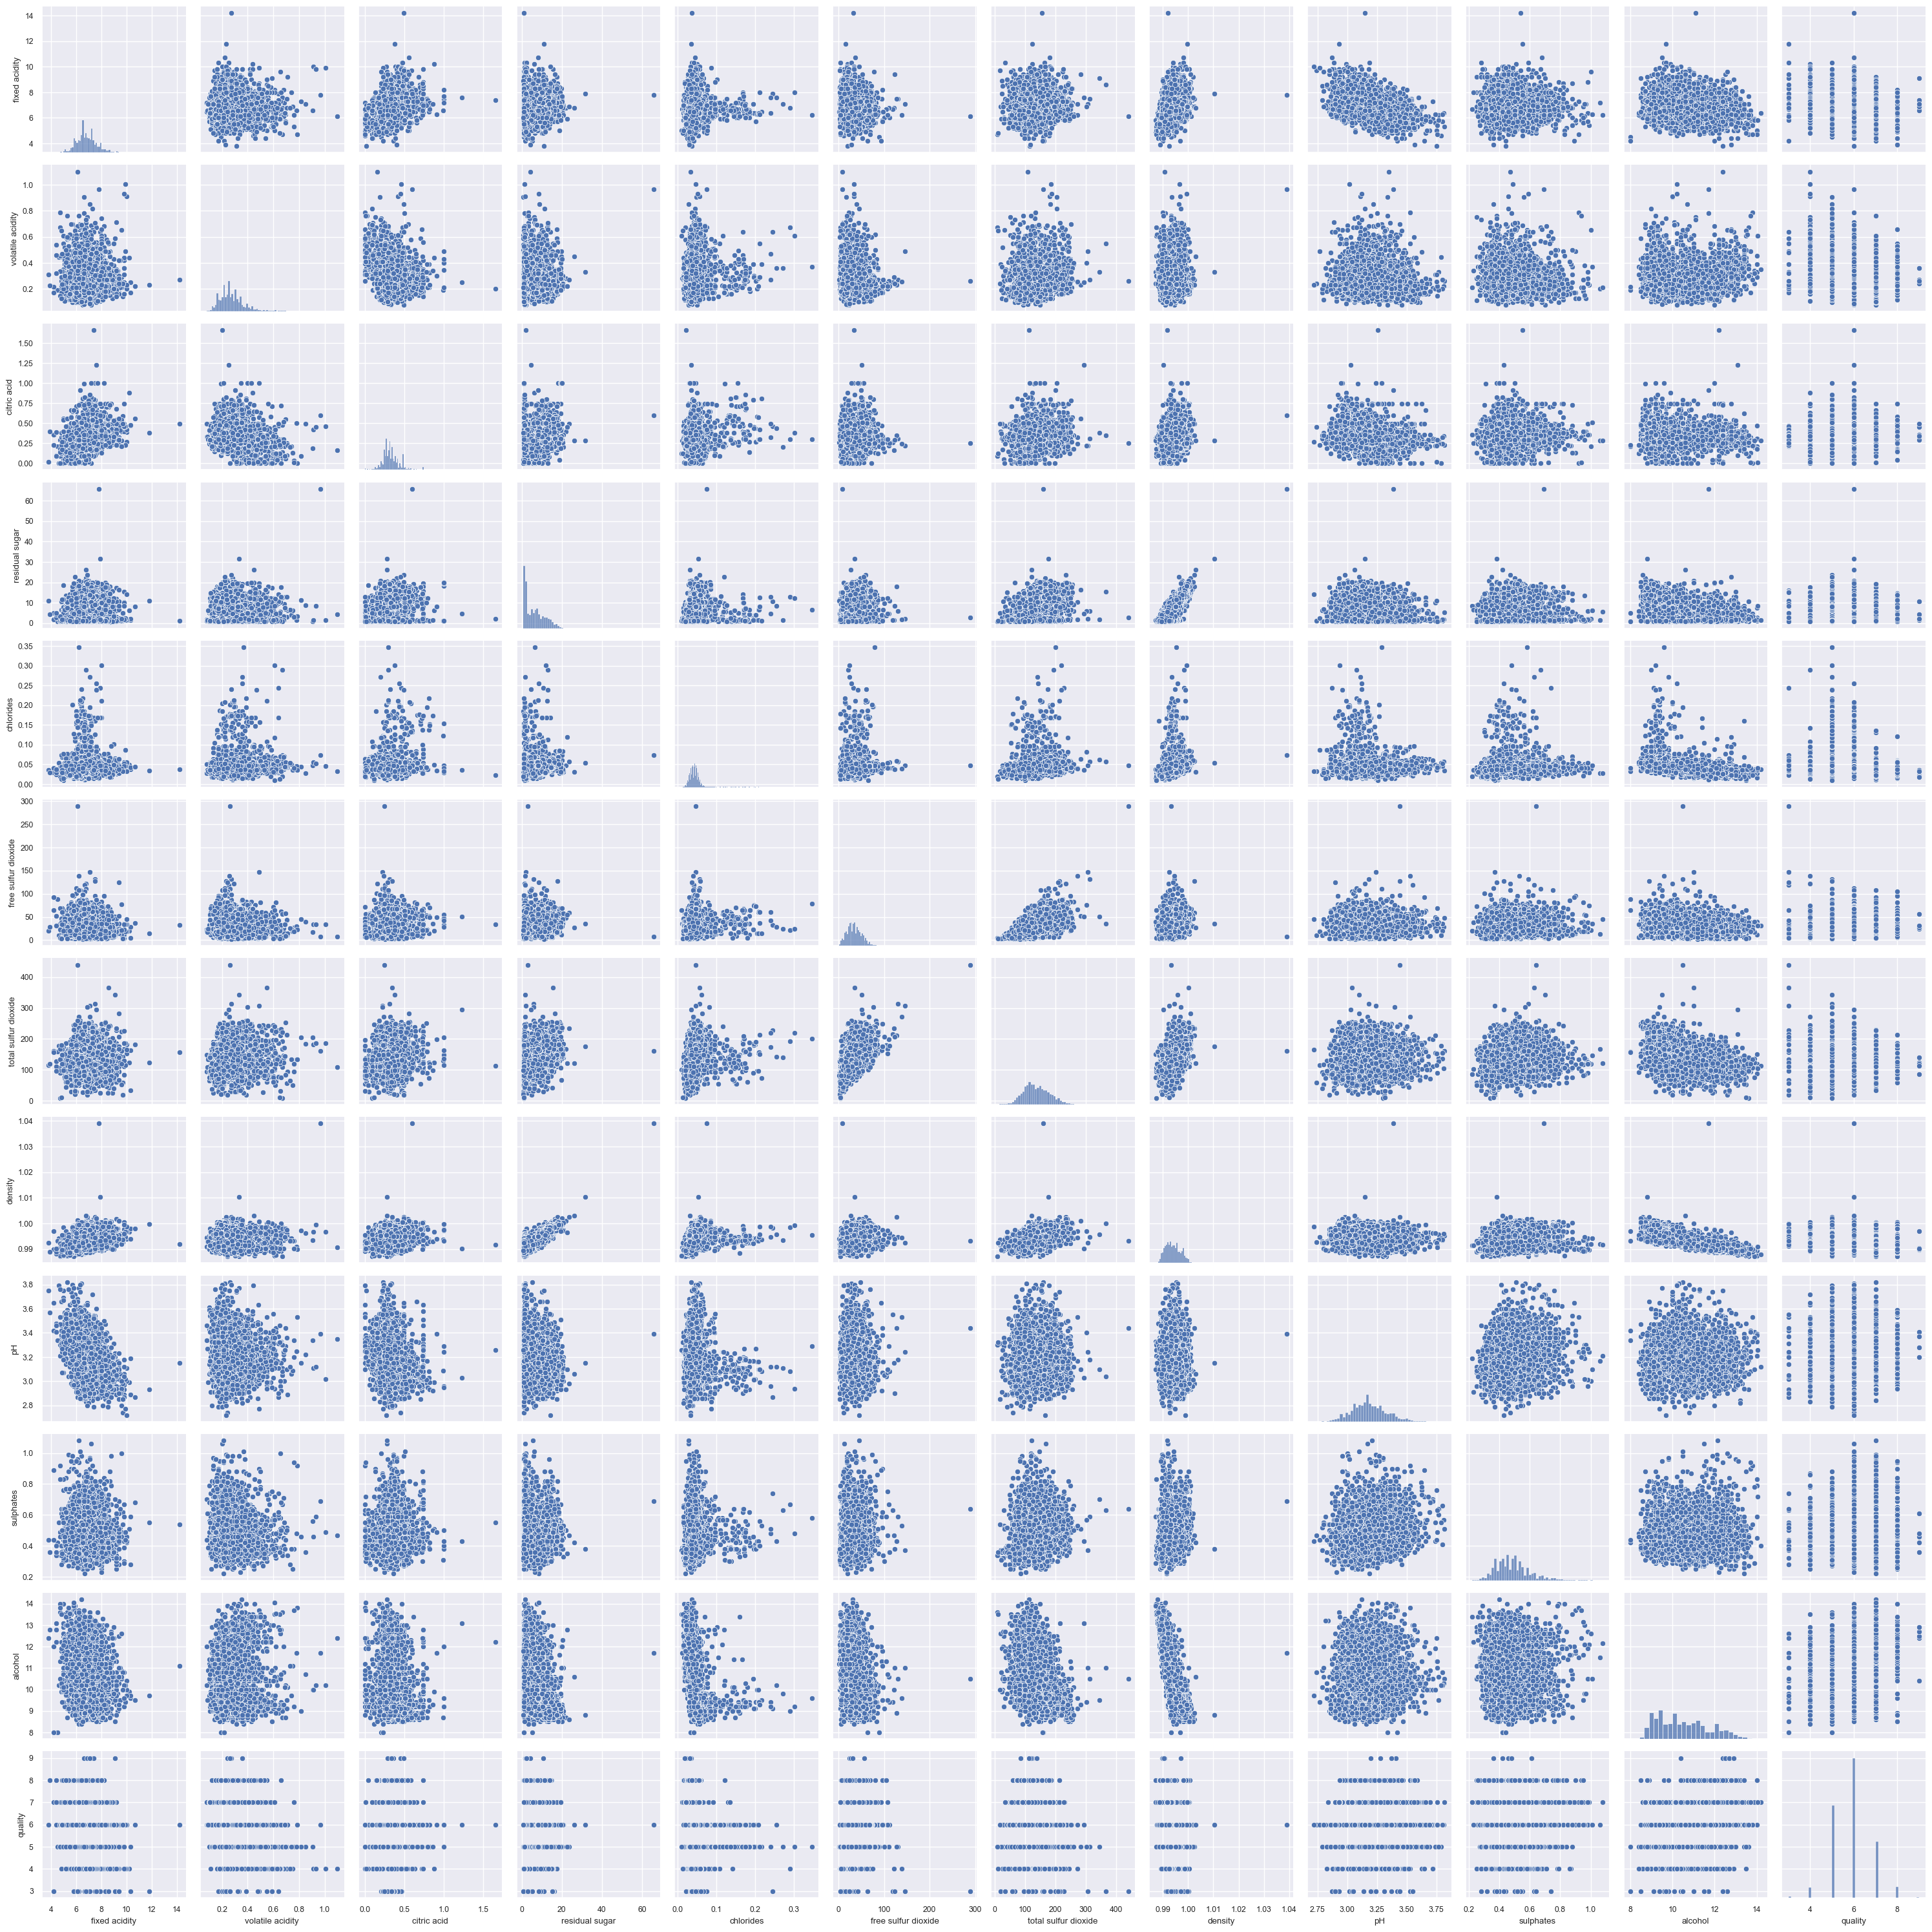

In [37]:
sns.set(font_scale=0.8)
sns.pairplot(white)
plt.tight_layout()
plt.show()

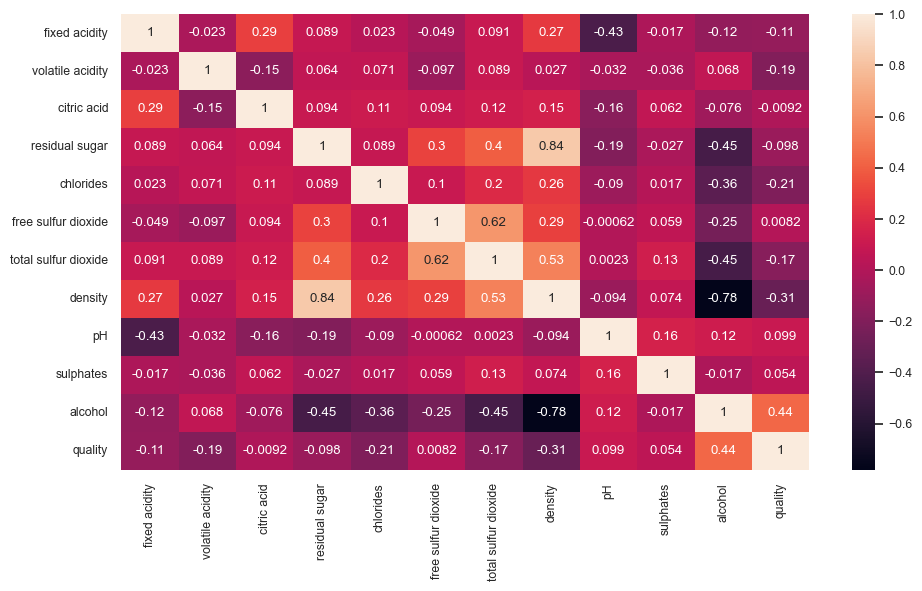

In [36]:
sns.set(font_scale=0.8)
sns.heatmap(white.corr(),annot=True, cmap=None)
plt.tight_layout()
plt.show()

<Axes: xlabel='alcohol', ylabel='Density'>

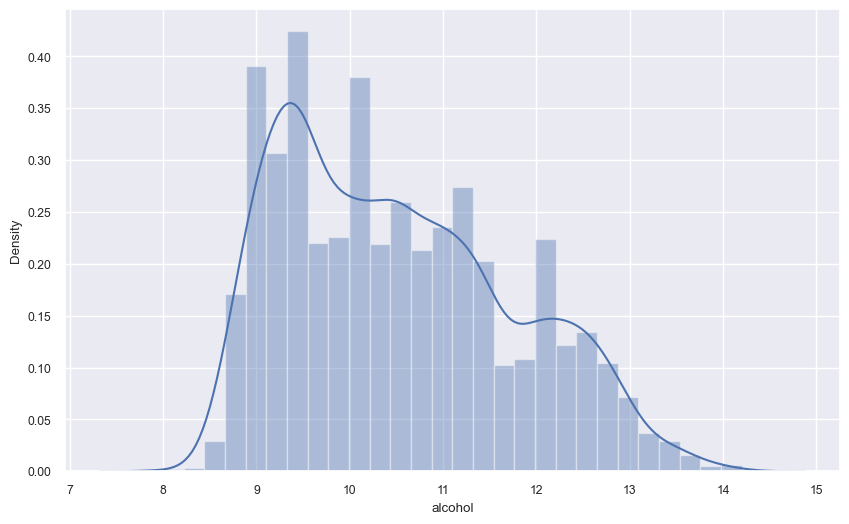

In [38]:
sns.distplot(white.alcohol)

In [41]:
from scipy.stats import skew
print("Skewness = " + str(skew(white.alcohol)))
print("Mean = " + str(white.alcohol.mean()))

Skewness = 0.48719273327634327
Mean = 10.514267047774602


<Axes: xlabel='quality', ylabel='alcohol'>

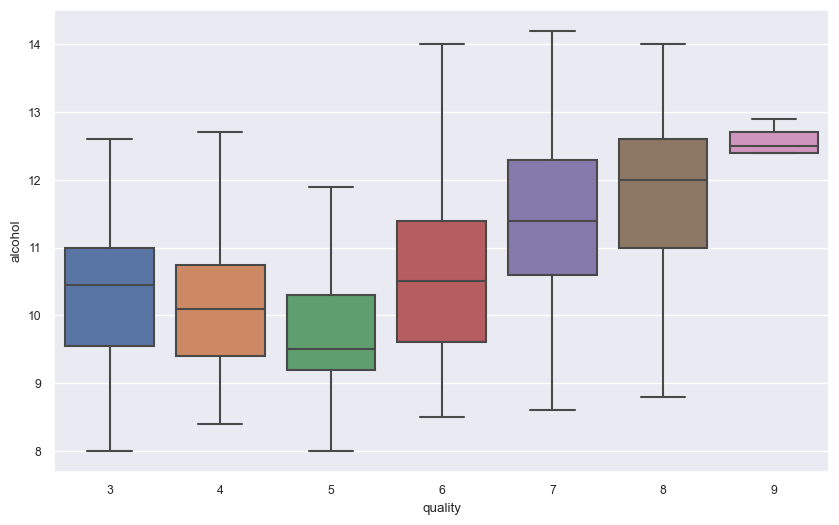

In [43]:
sns.boxplot(data = white,x='quality',y='alcohol',showfliers=False)

### Similar to red wine, here also, high quality wines have higher alcohol content

<Axes: xlabel='density', ylabel='alcohol'>

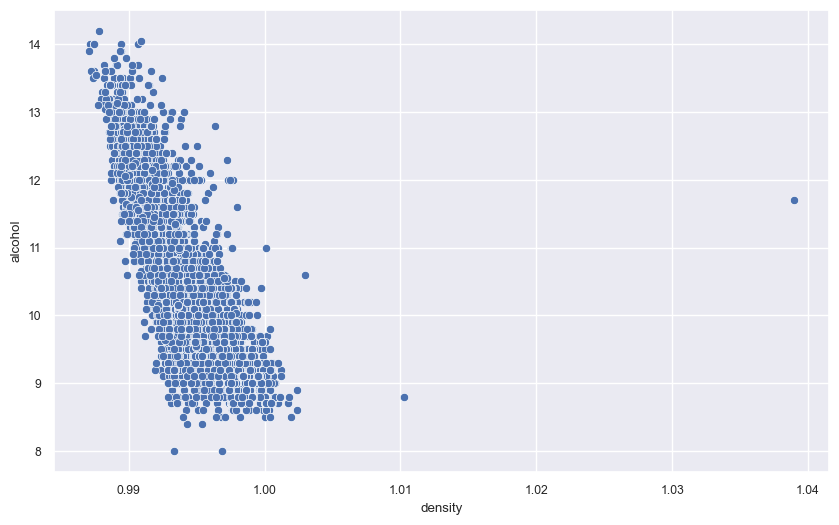

In [44]:
sns.scatterplot(data=white,x='density',y='alcohol')

<Axes: xlabel='density', ylabel='alcohol'>

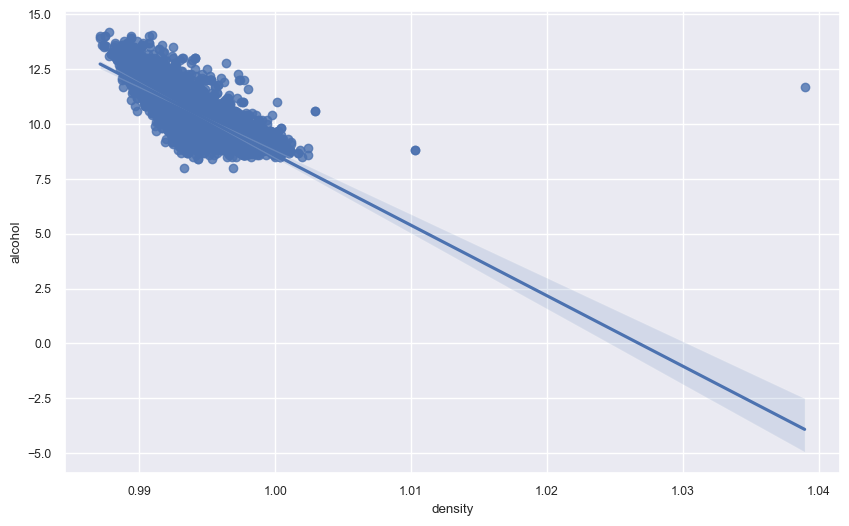

In [45]:
sns.regplot(data=white,x='density',y='alcohol')

### So alcohol content affects density negatively.

# Let's see the effect of sulfates on quality

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

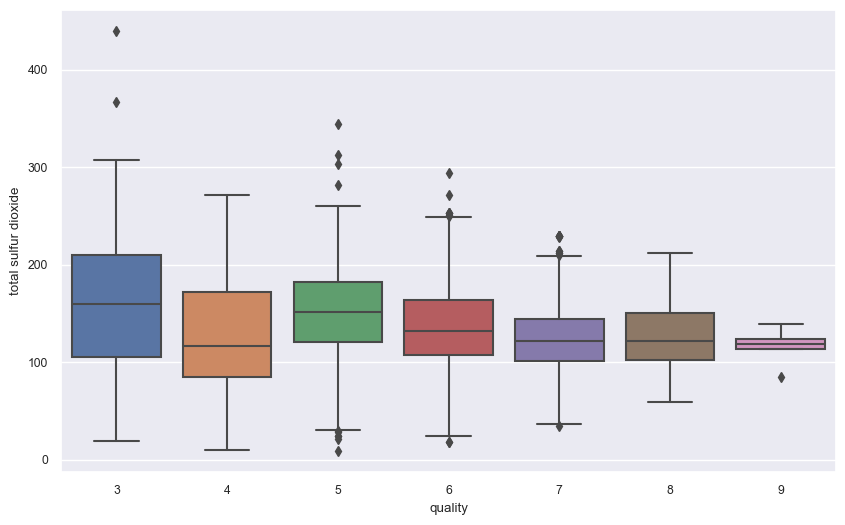

In [46]:
sns.boxplot(data=white,x='quality', y='total sulfur dioxide')

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

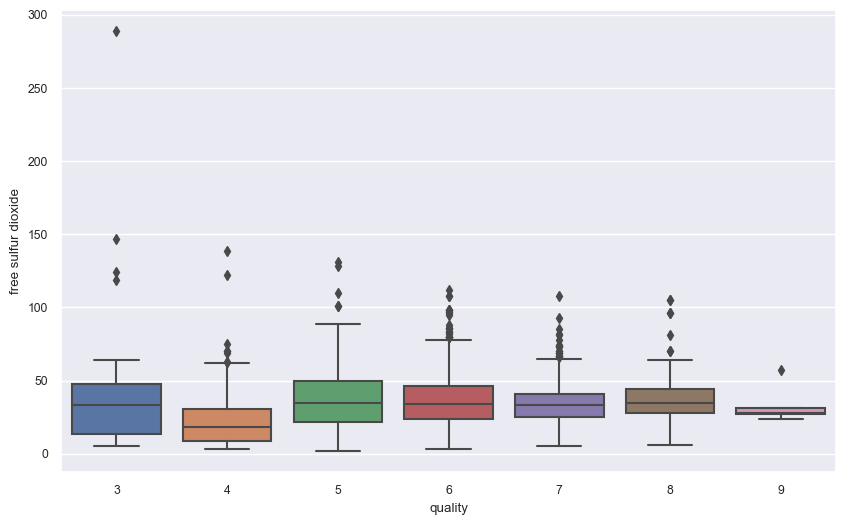

In [47]:
sns.boxplot(data=white,x='quality', y='free sulfur dioxide')

<Axes: xlabel='quality', ylabel='sulphates'>

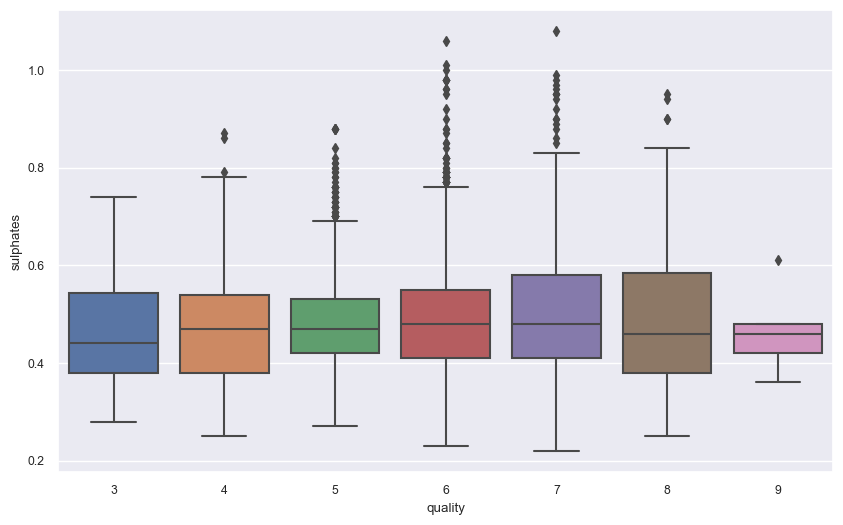

In [49]:
sns.boxplot(data=white,x='quality', y='sulphates')

### So sulphates have a flat affect on quality

# Effect of acid content on quality

<Axes: xlabel='quality', ylabel='citric acid'>

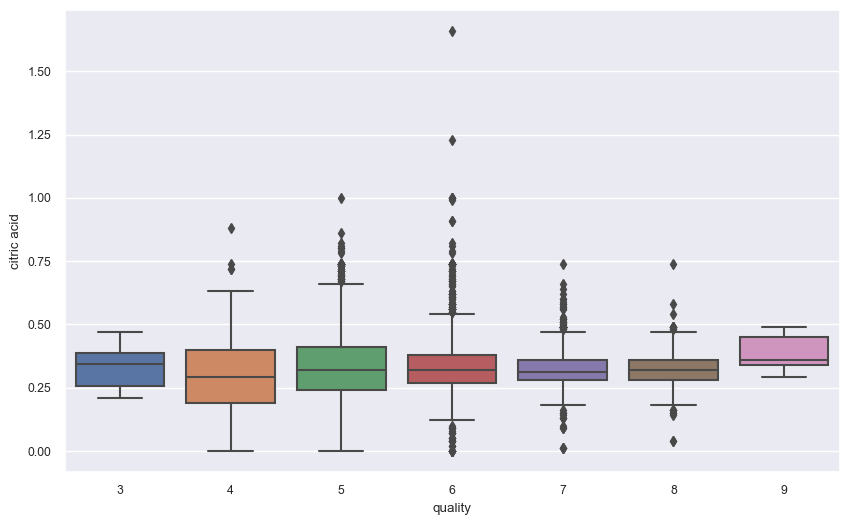

In [50]:
sns.boxplot(data=white,x='quality', y='citric acid')

<Axes: xlabel='quality', ylabel='fixed acidity'>

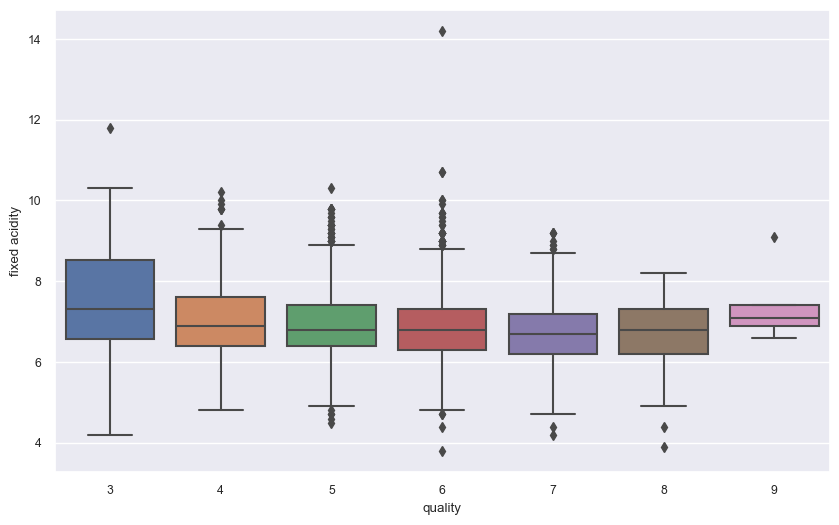

In [51]:
sns.boxplot(data=white,x='quality', y='fixed acidity')

<Axes: xlabel='quality', ylabel='volatile acidity'>

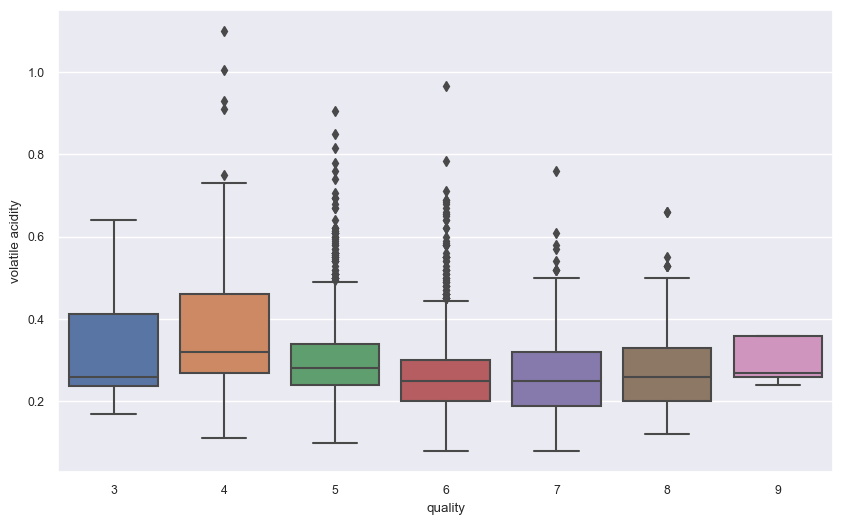

In [53]:
sns.boxplot(data=white,x='quality', y='volatile acidity')

In [55]:
white['total_acidity'] = white['fixed acidity']+white['volatile acidity']+white['citric acid']

<Axes: xlabel='quality', ylabel='total_acidity'>

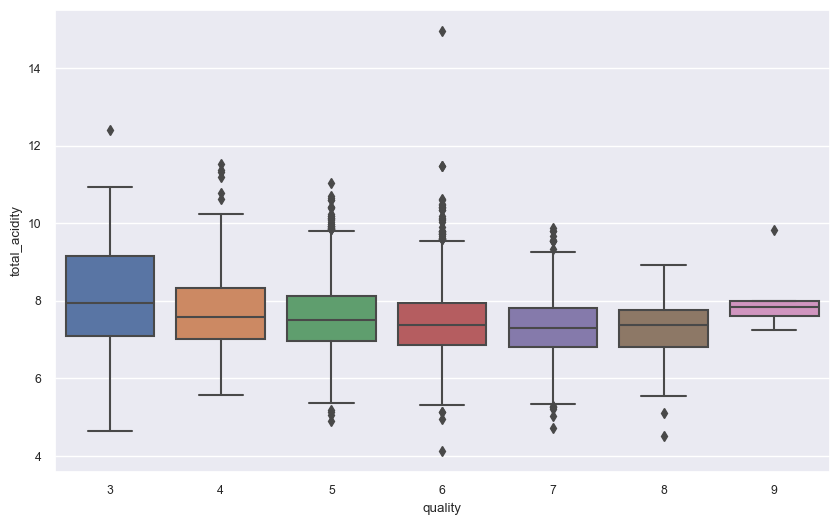

In [56]:
sns.boxplot(data=white,x='quality', y='total_acidity')

## so even total acidity is not showing any significant correlation with quality in case of white wine.

# CONCLUSIONS:

### Free sulphur dioxide and total sulphur dioxide have some positive relation to residual sugar. Also, quantity of SO2 depends on sugar content.
### Density has a positive correlation with fixed acidity and residual sugar
### Density has negative correlation with alcohol and pH
### Quality has positive correlation with alcohol, citric acid and sulphates are very weakly correlated with citric acid.
### Fixed acidity has very weak correalted with citric acid and density and negativly correlated wit pH.
### Residual sugar has positive correlation with citric acid
### pH has a negative correlation with fixed acidity and citric acid, but positively collrelated with volatile acid

# COMPARATIVE ANALYSIS

In [62]:
tem = []
for r in range(0,len(red)):
    tem.append("red")
red['type'] = tem.copy()

tem = []
for r in range(0,len(white)):
    tem.append("white")
white['type'] = tem.copy()

In [63]:
df = pd.concat([red,white])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


<Axes: xlabel='quality', ylabel='count'>

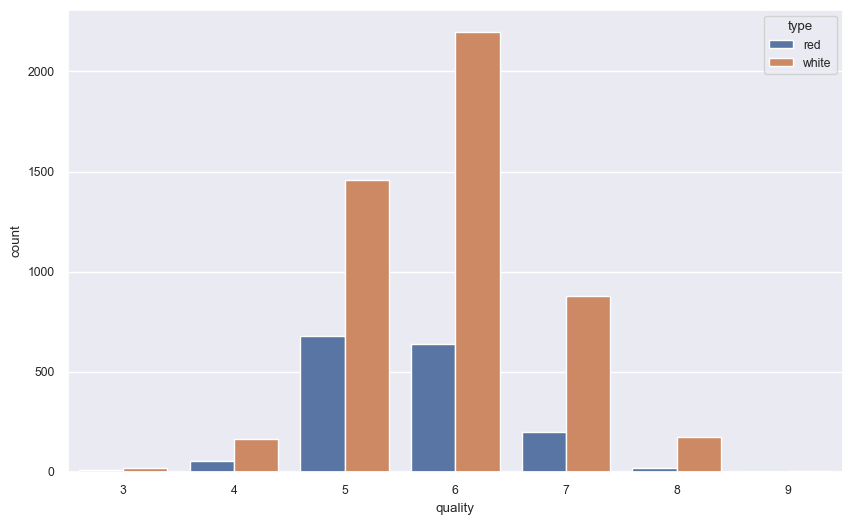

In [65]:
sns.countplot(data=df,x='quality', hue='type')

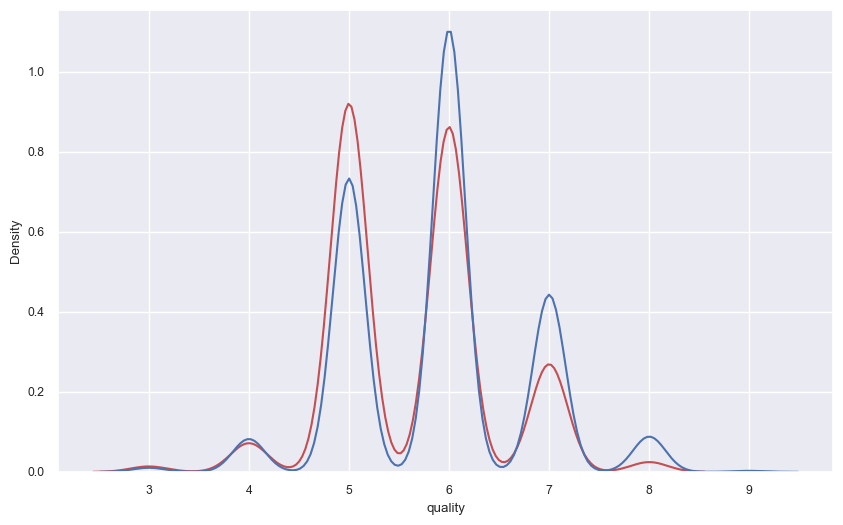

In [67]:
a = sns.kdeplot(data=red,x='quality', color='r',label="Red")
a = sns.kdeplot(data=white,x='quality', color='b',label="White")    